In [316]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sem

In [317]:
# Read the csvs into dataframes
df_wastewater_county = pd.read_csv('resources/wastewater_by_county.csv', parse_dates = True)
df_cases_county = pd.read_csv('resources/cases_by_county.csv', parse_dates = True)

# Convert dates into datetime format
df_wastewater_county['sampling_week'] = pd.to_datetime(df_wastewater_county['sampling_week'])
df_cases_county['date'] = pd.to_datetime(df_cases_county['date'])

# Display the dataframes
display(df_wastewater_county.head())
display(df_cases_county.head())


,sampling_week,effective_concentration_rolling_average,region,state,name,fipscode
0,2020-03-04,1.740219,Northeast,MA,"Suffolk County, MA",25025
1,2020-03-11,12.590344,Northeast,MA,"Suffolk County, MA",25025
2,2020-03-18,58.023322,Northeast,MA,"Suffolk County, MA",25025
3,2020-03-25,36.631750,West,CO,"Arapahoe County, CO",8005
4,2020-03-25,4051.550869,Northeast,NJ,"Essex County, NJ",34013


,date,rolling_average_cases_per_100k,region,state,name,fipscode
0,2020-11-09,40.954431,Northeast,MA,"Hampden County, MA",25013
1,2020-11-10,44.568958,Northeast,MA,"Hampden County, MA",25013
2,2020-11-12,47.999696,Northeast,MA,"Hampden County, MA",25013
3,2020-11-19,45.365380,Northeast,MA,"Hampden County, MA",25013
4,2020-11-21,47.570854,Northeast,MA,"Hampden County, MA",25013


In [318]:
# Get basic info about the dataframes
display(df_wastewater_county.info())
display(df_wastewater_county.shape)
display(df_cases_county.info())
display(df_cases_county.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15950 entries, 0 to 15949
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   sampling_week                            15950 non-null  datetime64[ns]
 1   effective_concentration_rolling_average  15950 non-null  float64       
 2   region                                   15950 non-null  object        
 3   state                                    15950 non-null  object        
 4   name                                     15950 non-null  object        
 5   fipscode                                 15950 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 747.8+ KB


None

(15950, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294925 entries, 0 to 294924
Data columns (total 6 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   date                            294925 non-null  datetime64[ns]
 1   rolling_average_cases_per_100k  294925 non-null  float64       
 2   region                          294925 non-null  object        
 3   state                           294925 non-null  object        
 4   name                            294925 non-null  object        
 5   fipscode                        294925 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 13.5+ MB


None

(294925, 6)

In [319]:

# Rename the columns in the dataframes to make the graphs look better
df_wastewater_county = df_wastewater_county.rename(columns = {'effective_concentration_rolling_average': 
                                                              'Antigens in Wastewater',
                                                              'name' :
                                                              'County Name',
                                                              'sampling_week':
                                                              'Date',
                                                              'state':
                                                              'State',
                                                              'region':
                                                              'Region',
                                                              'fipscode':
                                                              'Fipscode'})

df_cases_county = df_cases_county.rename(columns = {'rolling_average_cases_per_100k':
                                                    'Rolling Average Cases per 100K',
                                                    'name':
                                                    'County Name',
                                                    'date':
                                                    'Date',
                                                    'state':
                                                    'State',
                                                    'region':
                                                    'Region',
                                                    'fipscode':
                                                    'Fipscode'})

# Display the new column names
display(df_wastewater_county.head())
display(df_cases_county.head())



,Date,Antigens in Wastewater,Region,State,County Name,Fipscode
0,2020-03-04,1.740219,Northeast,MA,"Suffolk County, MA",25025
1,2020-03-11,12.590344,Northeast,MA,"Suffolk County, MA",25025
2,2020-03-18,58.023322,Northeast,MA,"Suffolk County, MA",25025
3,2020-03-25,36.631750,West,CO,"Arapahoe County, CO",8005
4,2020-03-25,4051.550869,Northeast,NJ,"Essex County, NJ",34013


,Date,Rolling Average Cases per 100K,Region,State,County Name,Fipscode
0,2020-11-09,40.954431,Northeast,MA,"Hampden County, MA",25013
1,2020-11-10,44.568958,Northeast,MA,"Hampden County, MA",25013
2,2020-11-12,47.999696,Northeast,MA,"Hampden County, MA",25013
3,2020-11-19,45.365380,Northeast,MA,"Hampden County, MA",25013
4,2020-11-21,47.570854,Northeast,MA,"Hampden County, MA",25013


In [320]:
# Combine the two dataframes and set the index to the date.
df_county = pd.concat([df_wastewater_county, df_cases_county], axis='rows', ignore_index=True)

# Set index to date
df_county = df_county.set_index('Date')

# Display the new dataframe
display(df_county.head())



,Antigens in Wastewater,Region,State,County Name,Fipscode,Rolling Average Cases per 100K
Date,,,,,,
2020-03-04,1.740219,Northeast,MA,"Suffolk County, MA",25025,NaN
2020-03-11,12.590344,Northeast,MA,"Suffolk County, MA",25025,NaN
2020-03-18,58.023322,Northeast,MA,"Suffolk County, MA",25025,NaN
2020-03-25,36.631750,West,CO,"Arapahoe County, CO",8005,NaN
2020-03-25,4051.550869,Northeast,NJ,"Essex County, NJ",34013,NaN


,Antigens in Wastewater,Rolling Average Cases per 100K
Antigens in Wastewater,1.000000,0.780039
Rolling Average Cases per 100K,0.780039,1.000000


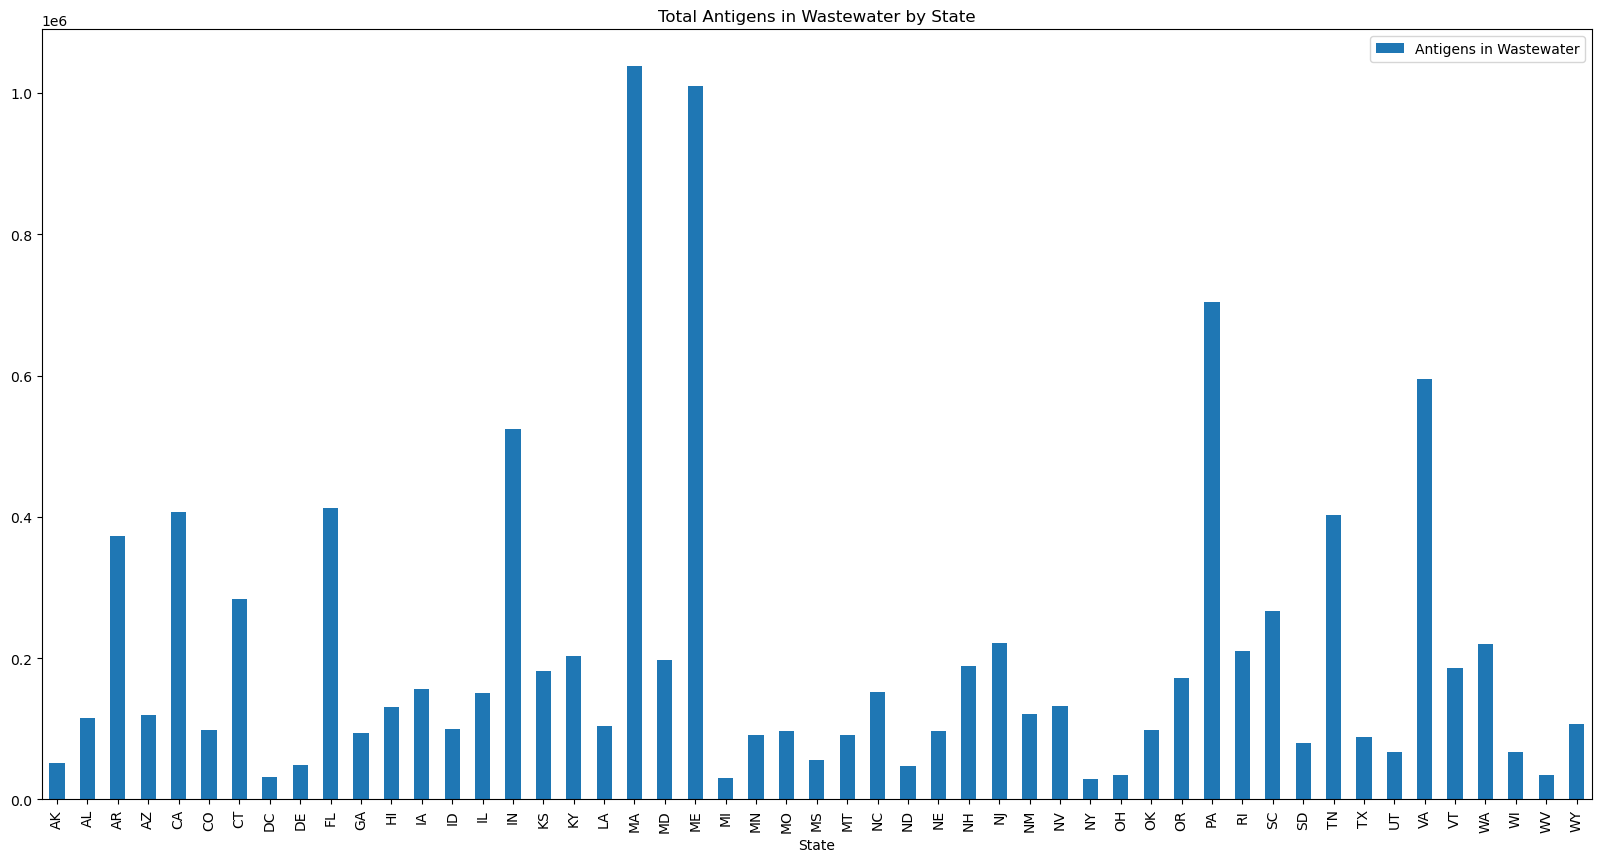

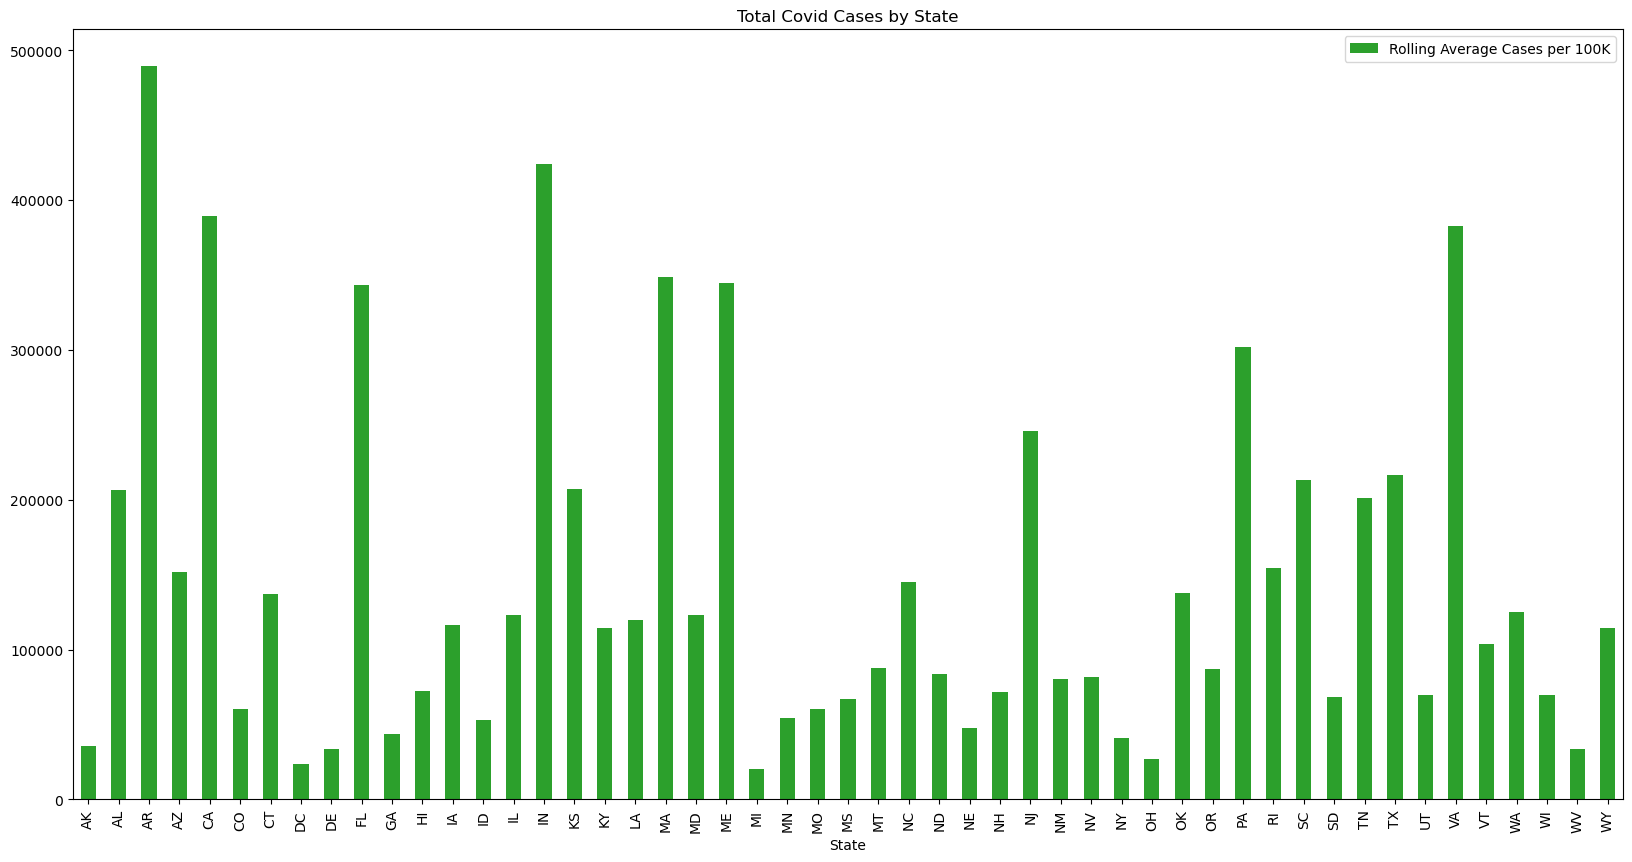

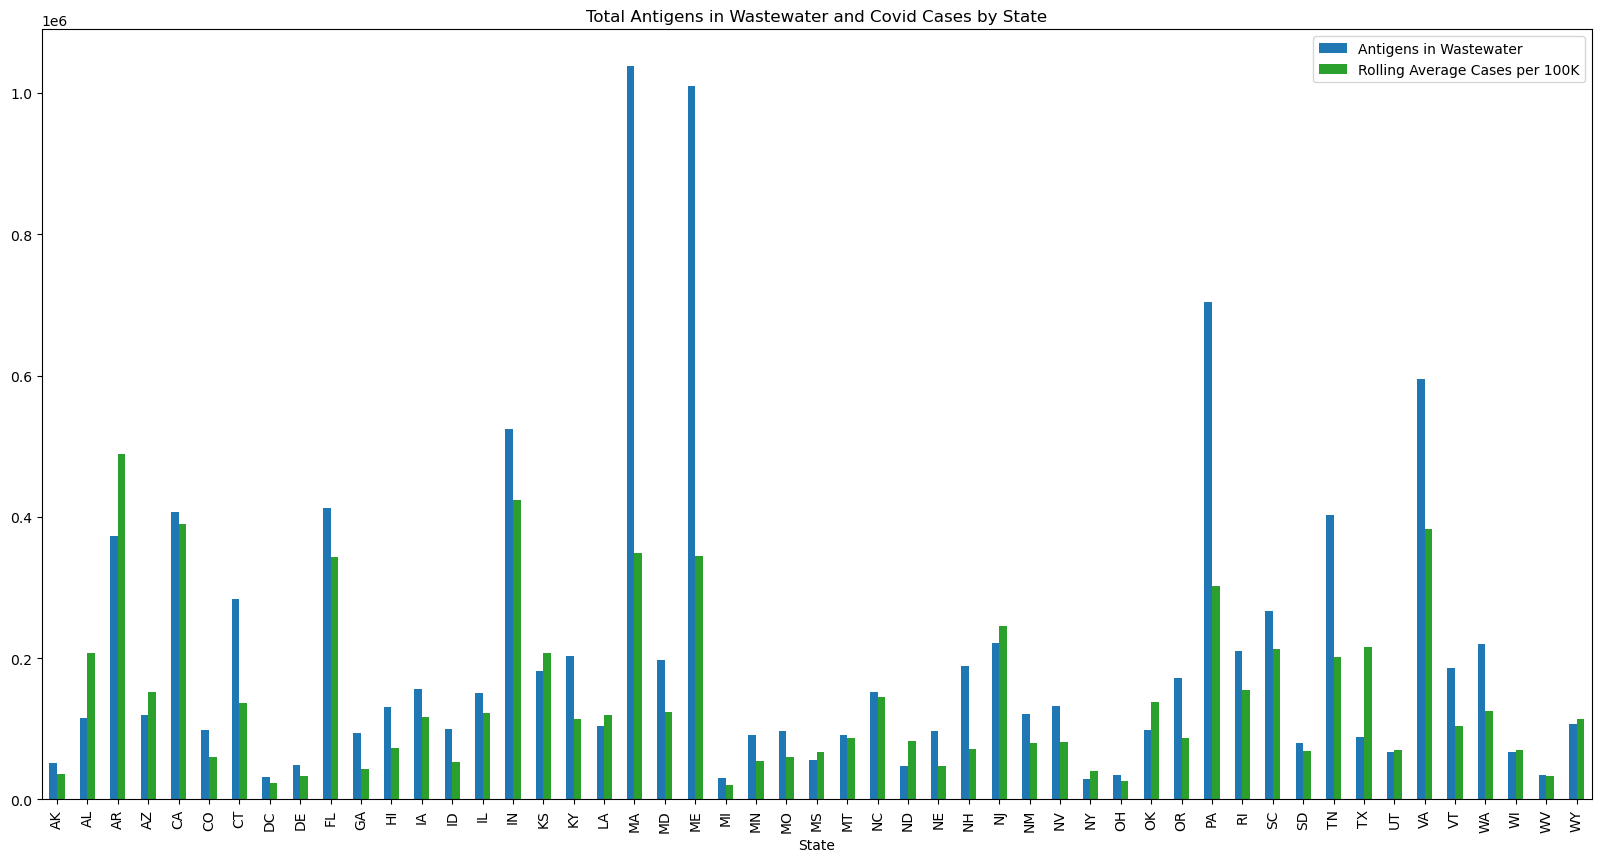

In [321]:
# Create a pivot table to compare the Antigens in Wastewater to the Rolling average of cases of covid by location.
df_pivot_state = df_county.pivot_table(values= ['Antigens in Wastewater', 'Rolling Average Cases per 100K'],
                                index= ['State'],
                                aggfunc= 'sum')

# Clean NA from pivot table
df_pivot_state = df_pivot_state.replace(0, np.nan)
df_pivot_state = df_pivot_state.dropna()

# Plot the pivot table
df_pivot_state.plot(kind = 'bar', 
                    y = 'Antigens in Wastewater', 
                    figsize=(20, 10),
                    title = 'Total Antigens in Wastewater by State')
plt.savefig('images/state_comparison_anti.png')

df_pivot_state.plot(kind = 'bar', 
                    y = 'Rolling Average Cases per 100K', 
                    figsize=(20, 10), 
                    color = 'tab:Green',
                    title = 'Total Covid Cases by State')
plt.savefig('images/state_comparison_cases.png')

df_pivot_state.plot(kind = 'bar', 
                    y = ['Antigens in Wastewater', 'Rolling Average Cases per 100K'], 
                    figsize=(20, 10), 
                    color = {'Rolling Average Cases per 100K':
                             'tab:green',
                             'Antigens in Wastewater': 'tab:blue'},
                    title = 'Total Antigens in Wastewater and Covid Cases by State')

plt.savefig('images/state_comparison.png')

display(df_pivot_state.corr())


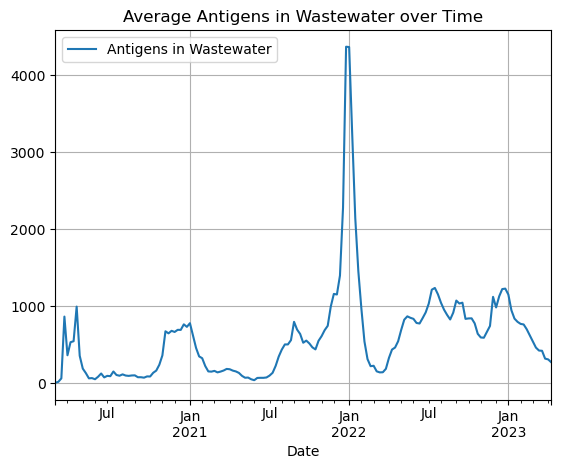

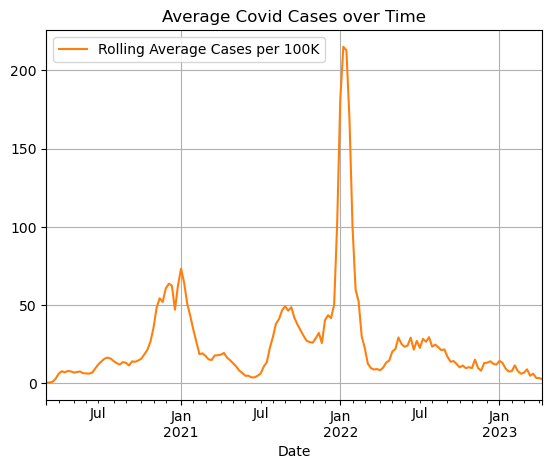

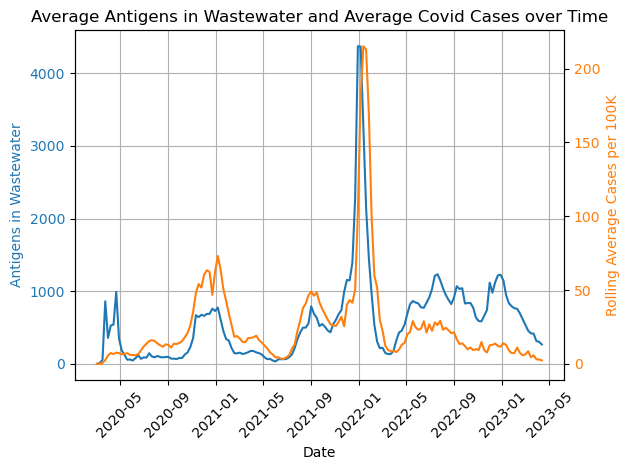

,Antigens in Wastewater,Rolling Average Cases per 100K
Antigens in Wastewater,1.000000,0.680122
Rolling Average Cases per 100K,0.680122,1.000000


In [322]:
# Create a pivot table
df_pivot_date = df_county.pivot_table(values=['Antigens in Wastewater', 'Rolling Average Cases per 100K'],
                                       index=['Date'],
                                       aggfunc='mean')

# Clean NA from pivot table
df_pivot_date = df_pivot_date.replace(0, np.nan)
df_pivot_date = df_pivot_date.dropna()

# Plot antigens and cases over time.
df_pivot_date.plot(kind= 'line', y = 'Antigens in Wastewater', title = 'Average Antigens in Wastewater over Time').grid()
plt.savefig('images/time_comparison_anti.png')
df_pivot_date.plot(kind= 'line', y = 'Rolling Average Cases per 100K', title = 'Average Covid Cases over Time', color = 'tab:orange').grid()
plt.savefig('images/time_comparison_cases.png')

fig, ax1 = plt.subplots()
plt.xticks(rotation=45)
# Plot the first metric on the first y-axis (left side)
ax1.set_xlabel('Date')
ax1.set_ylabel('Antigens in Wastewater', color='tab:blue')
ax1.plot(df_pivot_date['Antigens in Wastewater'], color='tab:blue', label='Antigens in Wastewater')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid()
# Create a second y-axis sharing the same x-axis (right side)
ax2 = ax1.twinx()
ax2.set_ylabel('Rolling Average Cases per 100K', color='tab:orange')
ax2.plot(df_pivot_date['Rolling Average Cases per 100K'], color='tab:orange', label='Rolling Average Cases per 100K')
ax2.tick_params(axis='y', labelcolor='tab:orange')
# Add a title and show the plot
plt.title("Average Antigens in Wastewater and Average Covid Cases over Time")
fig.tight_layout()  # To prevent labels from overlapping
plt.savefig('images/time_comparison.png')
plt.show()


display(df_pivot_date.corr())


In [323]:
# MA had highest antigens, AR had most cases
df_highest_anti_state =  df_county.loc[df_county['State'] == 'MA']
df_highest_cases_state = df_county.loc[df_county['State'] == 'AR']

display(df_highest_anti_state.head())
display(df_highest_cases_state.head())



,Antigens in Wastewater,Region,State,County Name,Fipscode,Rolling Average Cases per 100K
Date,,,,,,
2020-03-04,1.740219,Northeast,MA,"Suffolk County, MA",25025,NaN
2020-03-11,12.590344,Northeast,MA,"Suffolk County, MA",25025,NaN
2020-03-18,58.023322,Northeast,MA,"Suffolk County, MA",25025,NaN
2020-03-25,159.454813,Northeast,MA,"Suffolk County, MA",25025,NaN
2020-04-01,29.605173,Northeast,MA,"Hampshire County, MA",25015,NaN


,Antigens in Wastewater,Region,State,County Name,Fipscode,Rolling Average Cases per 100K
Date,,,,,,
2021-06-09,126.399426,South,AR,"Benton County, AR",5007,NaN
2021-06-09,127.391232,South,AR,"Pulaski County, AR",5119,NaN
2021-06-16,169.149203,South,AR,"Benton County, AR",5007,NaN
2021-06-16,204.894487,South,AR,"Pulaski County, AR",5119,NaN
2021-06-23,203.393905,South,AR,"Benton County, AR",5007,NaN


In [324]:
# Time slice, both averages peak at the same time.

df_highest_anti_time = df_county.sort_index().loc['2021-10' : '2022-03', :]

# Read the table
display(df_highest_anti_time.head())


,Antigens in Wastewater,Region,State,County Name,Fipscode,Rolling Average Cases per 100K
Date,,,,,,
2021-10-01,NaN,West,OR,"Multnomah County, OR",41051,19.648558
2021-10-01,NaN,West,CA,"Kings County, CA",6031,56.604831
2021-10-01,NaN,South,AR,"Washington County, AR",5143,28.608817
2021-10-01,NaN,South,TN,"Davidson County, TN",47037,36.715313
2021-10-01,NaN,Midwest,IN,"Kosciusko County, IN",18085,41.712214


,Antigens in Wastewater,Rolling Average Cases per 100K
Antigens in Wastewater,1.000000,0.488863
Rolling Average Cases per 100K,0.488863,1.000000


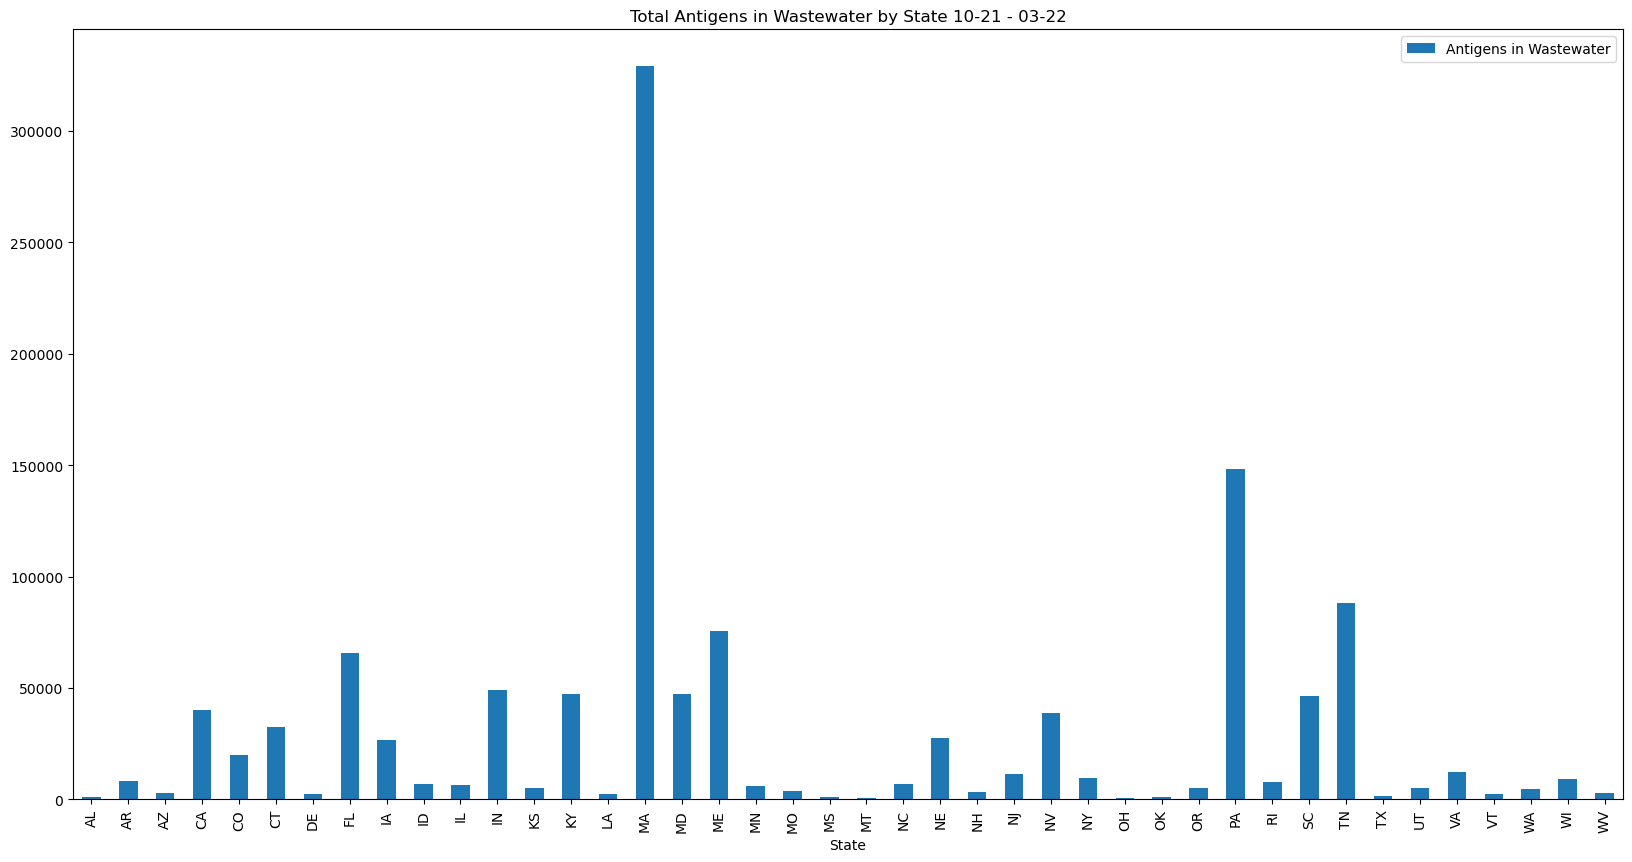

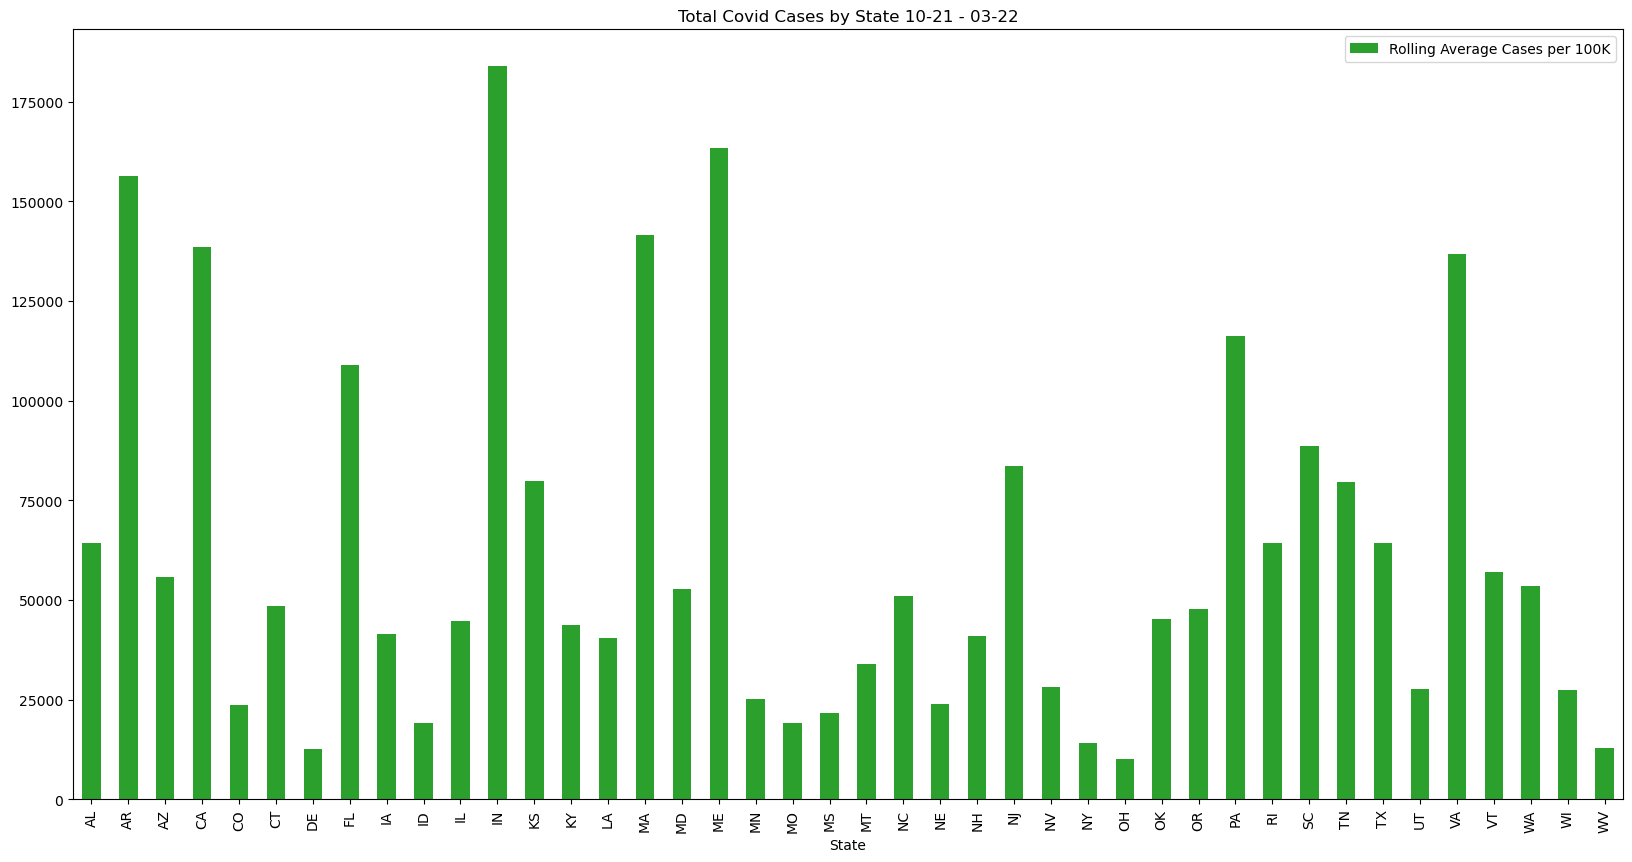

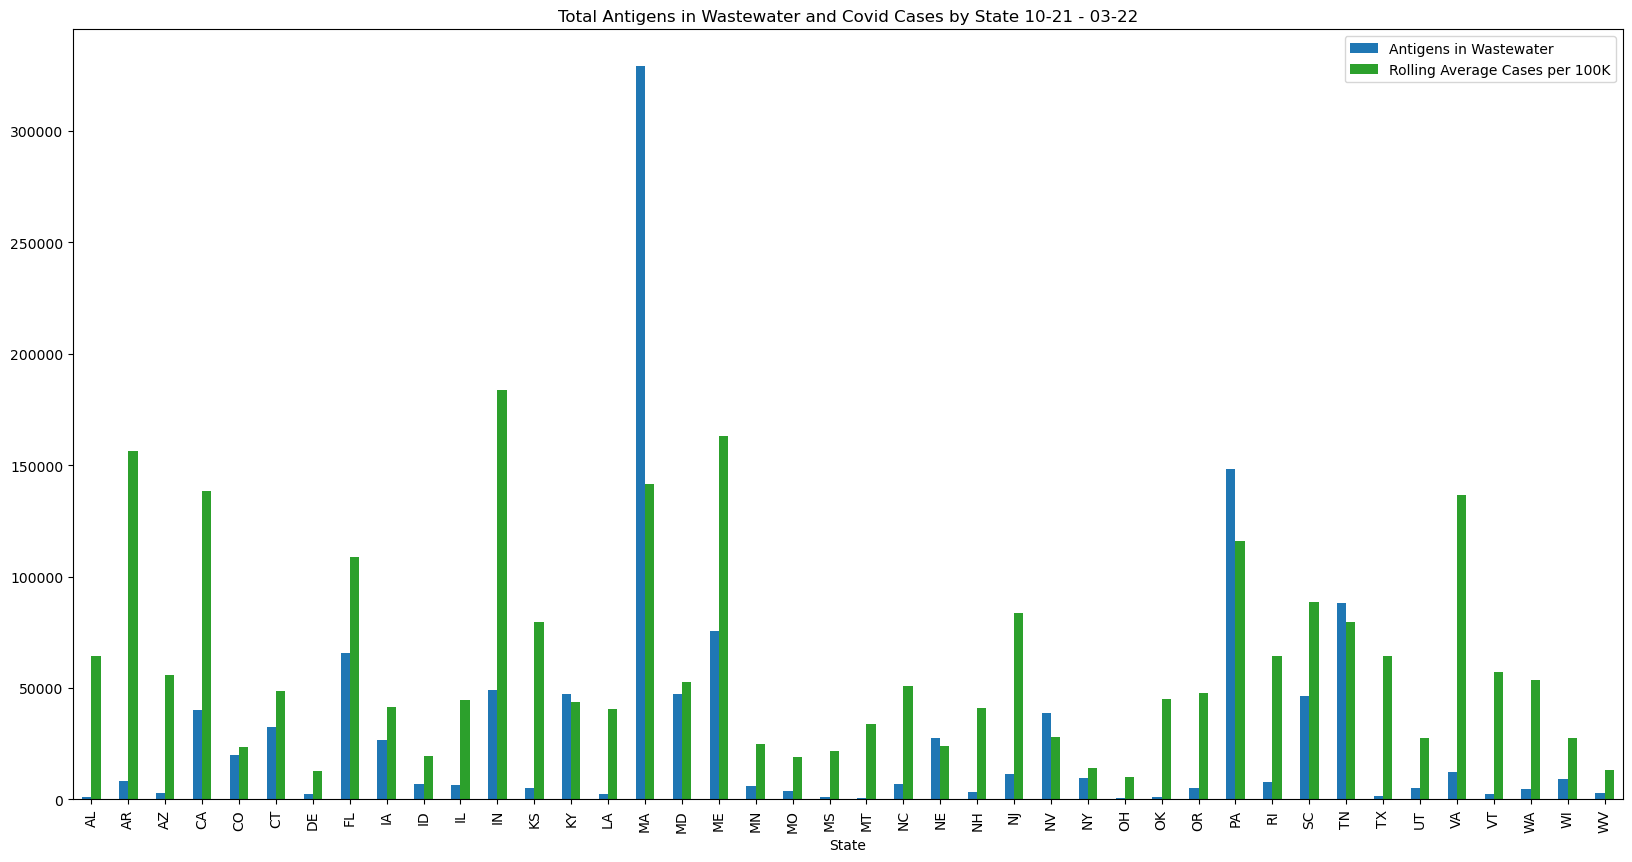

In [325]:
# Create the pivot table for time slice
df_pivot_anti_high_time = df_highest_anti_time.pivot_table(values=['Antigens in Wastewater', 'Rolling Average Cases per 100K'],
                                       index=['State'],
                                       aggfunc='sum')

# Clean the pivot table of NA
df_pivot_anti_high_time = df_pivot_anti_high_time.replace(0, np.nan)
df_pivot_anti_high_time = df_pivot_anti_high_time.dropna()

# Plot the pivot table
df_pivot_anti_high_time.plot(kind = 'bar', 
                    y = 'Antigens in Wastewater', 
                    figsize=(20, 10),
                    title = 'Total Antigens in Wastewater by State 10-21 - 03-22')
plt.savefig('images/state_compare_time_slice_anti.png')

df_pivot_anti_high_time.plot(kind = 'bar', 
                    y = 'Rolling Average Cases per 100K', 
                    figsize=(20, 10), 
                    color = 'tab:Green',
                    title = 'Total Covid Cases by State 10-21 - 03-22')
plt.savefig('images/state_compare_time_slice_cases.png')

df_pivot_anti_high_time.plot(kind = 'bar', 
                    y = ['Antigens in Wastewater', 'Rolling Average Cases per 100K'], 
                    figsize=(20, 10), 
                    color = {'Rolling Average Cases per 100K':
                             'tab:green',
                             'Antigens in Wastewater': 'tab:blue'},
                    title = 'Total Antigens in Wastewater and Covid Cases by State 10-21 - 03-22')
plt.savefig('images/state_compare_time_slice.png')
display(df_pivot_anti_high_time.corr())

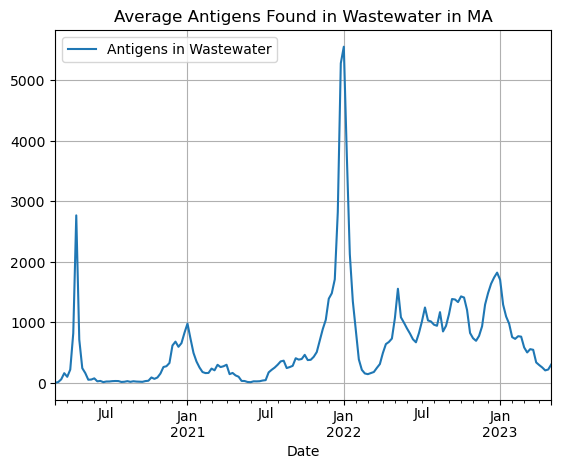

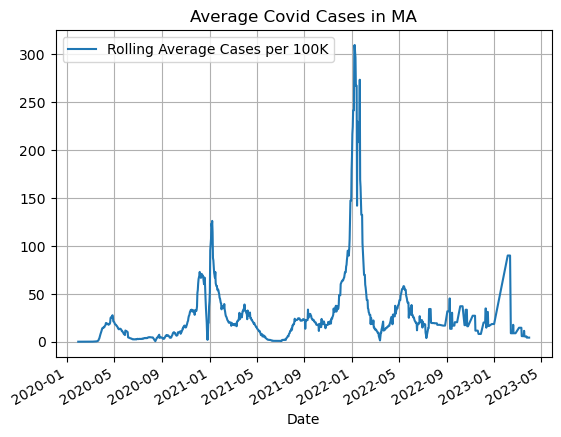

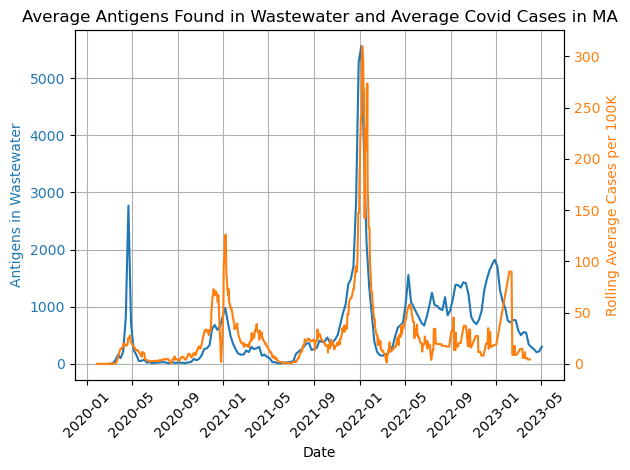

Antigens in Wastewater    0.769386
dtype: float64

In [326]:
# Create a pivot table for the data from MA for antigens
df_pivot_anti_high_state_anti = df_highest_anti_state.pivot_table(values=['Antigens in Wastewater'],
                                       index=['Date'],
                                       aggfunc='mean')

# Clean the pivot table of NA
df_pivot_anti_high_state_anti = df_pivot_anti_high_state_anti.replace(0, np.nan)
df_pivot_anti_high_state_anti = df_pivot_anti_high_state_anti.dropna()

# Create a pivot table for the data from MA for cases
df_pivot_anti_high_state_cases = df_highest_anti_state.pivot_table(values=['Rolling Average Cases per 100K'],
                                       index=['Date'],
                                       aggfunc='mean')

# Clean the pivot table of NA
df_pivot_anti_high_state_cases = df_pivot_anti_high_state_cases.replace(0, np.nan)
df_pivot_anti_high_state_cases = df_pivot_anti_high_state_cases.dropna()

# Plot the tables
df_pivot_anti_high_state_anti.plot(title = 'Average Antigens Found in Wastewater in MA').grid()
plt.savefig('images/time_compare_MA_anti.png')
df_pivot_anti_high_state_cases.plot(title = 'Average Covid Cases in MA').grid()
plt.savefig('images/time_compare_MA_cases.png')

# Combine the tables and plot
fig, ax1 = plt.subplots()
plt.xticks(rotation=45)
# Plot the first metric on the first y-axis (left side)
ax1.set_xlabel('Date')
ax1.set_ylabel('Antigens in Wastewater', color='tab:blue')
ax1.plot(df_pivot_anti_high_state_anti['Antigens in Wastewater'], color='tab:blue', label='Antigens in Wastewater')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid()
# Create a second y-axis sharing the same x-axis (right side)
ax2 = ax1.twinx()
ax2.set_ylabel('Rolling Average Cases per 100K', color='tab:orange')
ax2.plot(df_pivot_anti_high_state_cases['Rolling Average Cases per 100K'], color='tab:orange', label='Rolling Average Cases per 100K')
ax2.tick_params(axis='y', labelcolor='tab:orange')
# Add a title and show the plot
plt.title("Average Antigens Found in Wastewater and Average Covid Cases in MA")
fig.tight_layout()  # To prevent labels from overlapping
plt.savefig('images/time_compare_MA.png')
plt.show()

display(df_pivot_anti_high_state_anti.corrwith(df_pivot_anti_high_state_cases['Rolling Average Cases per 100K']))

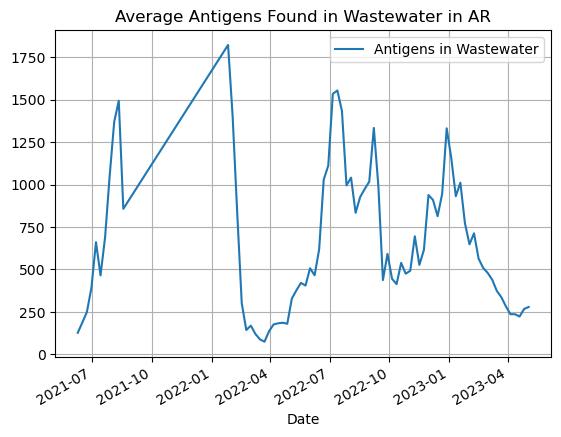

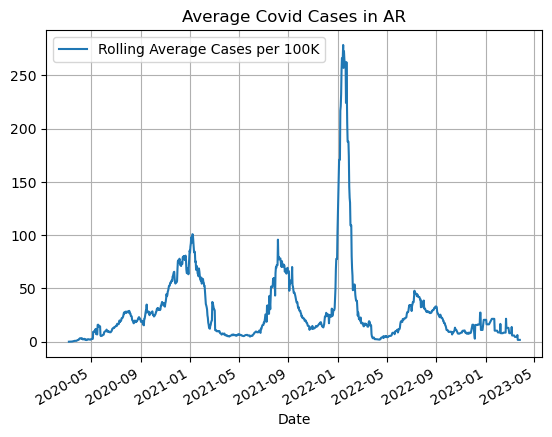

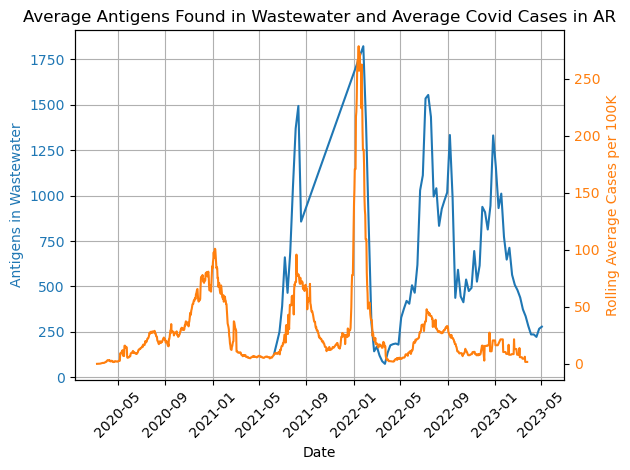

Antigens in Wastewater    0.670741
dtype: float64

In [327]:
# Create a pivot table for the data from AR for antigens
df_pivot_cases_high_state_anti = df_highest_cases_state.pivot_table(values=['Antigens in Wastewater'],
                                       index=['Date'],
                                       aggfunc='mean')

# Clean the pivot table of NA
df_pivot_cases_high_state_anti = df_pivot_cases_high_state_anti.replace(0, np.nan)
df_pivot_cases_high_state_anti = df_pivot_cases_high_state_anti.dropna()

# Create a pivot table for the data from AR for cases
df_pivot_cases_high_state_cases = df_highest_cases_state.pivot_table(values=['Rolling Average Cases per 100K'],
                                       index=['Date'],
                                       aggfunc='mean')

# Clean the pivot table of NA
df_pivot_cases_high_state_cases = df_pivot_cases_high_state_cases.replace(0, np.nan)
df_pivot_cases_high_state_cases = df_pivot_cases_high_state_cases.dropna()

# Plot the tables
df_pivot_cases_high_state_anti.plot(title = 'Average Antigens Found in Wastewater in AR').grid()
plt.savefig('images/time_compare_AR_anti.png')
df_pivot_cases_high_state_cases.plot(title = 'Average Covid Cases in AR').grid()
plt.savefig('images/time_compare_AR_cases.png')

# Combine the tables and plot
fig, ax1 = plt.subplots()
plt.xticks(rotation=45)
# Plot the first metric on the first y-axis (left side)
ax1.set_xlabel('Date')
ax1.set_ylabel('Antigens in Wastewater', color='tab:blue')
ax1.plot(df_pivot_cases_high_state_anti['Antigens in Wastewater'], color='tab:blue', label='Antigens in Wastewater')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid()
# Create a second y-axis sharing the same x-axis (right side)
ax2 = ax1.twinx()
ax2.set_ylabel('Rolling Average Cases per 100K', color='tab:orange')
ax2.plot(df_pivot_cases_high_state_cases['Rolling Average Cases per 100K'], color='tab:orange', label='Rolling Average Cases per 100K')
ax2.tick_params(axis='y', labelcolor='tab:orange')
# Add a title and show the plot
plt.title("Average Antigens Found in Wastewater and Average Covid Cases in AR")
fig.tight_layout()  # To prevent labels from overlapping
plt.savefig('images/time_compare_AR.png')
plt.show()

display(df_pivot_cases_high_state_anti.corrwith(df_pivot_cases_high_state_cases['Rolling Average Cases per 100K']))
